# NAIVE BAYES

In [21]:
from formulas import *
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

keras = tf.keras

**Data Import**

In [22]:
# Read data in to dataframes
nabil = pd.read_csv('../Data/NABILModifiedDate.csv')

# Change date column to datetime type
nabil['Date'] = pd.to_datetime(nabil['Date'])

In [23]:
nabil.tail(100)

,Date,Open,High,Low,Close,Percent Change,Volume
2045,2022-07-27,866.0,870.0,853.0,866.0,0.00,43850
2046,2022-07-28,880.0,880.0,865.0,866.0,0.00,43396
2047,2022-07-29,866.0,880.0,865.0,869.9,0.45,17497
2048,2022-07-31,879.0,882.0,871.0,881.0,1.28,52796
2049,2022-08-01,894.9,897.5,880.0,881.9,0.10,47675
...,...,...,...,...,...,...,...
2140,2022-12-22,809.0,811.0,800.1,810.0,0.37,66052
2141,2022-12-26,811.0,840.0,811.0,838.0,3.46,110057
2142,2022-12-27,847.0,860.0,834.0,842.0,0.48,133855
2143,2022-12-28,845.0,847.0,826.1,834.9,-0.84,105429


In [24]:
nabil.dropna(inplace=True)

**NABIL Train Test Split**

Here we can see our complete plot in terms of time steps. Our entire data set is just shy of 2200 time steps. We know that our data is in days, so our data is just shy of 2200 daily observations. We need to separate out a training and validation set to see how our model holds up.

I will be choosing an arbitrary date to separate the training, validation, and test data.

In [25]:
series = nabil['Close']

# CREATE THE TRAIN TEST DATASET
train_split_date = '2019-12-31'
train_split_index = np.where(nabil.Date == train_split_date)[0][0]
x_train = nabil.loc[nabil['Date'] <= train_split_date]['Close']

# CREATE THE TEST DATASET
test_split_date = '2021-01-03'
test_split_index = np.where(nabil.Date == test_split_date)[0][0]
x_test = nabil.loc[nabil['Date'] >= test_split_date]['Close']

# CREATE THE VALIDATION DATASET
valid_split_index = (train_split_index.max(),test_split_index.min())
x_valid = nabil.loc[(nabil['Date'] < test_split_date) & (nabil['Date'] > train_split_date)]['Close']

1479 1480 1663 1664 2144


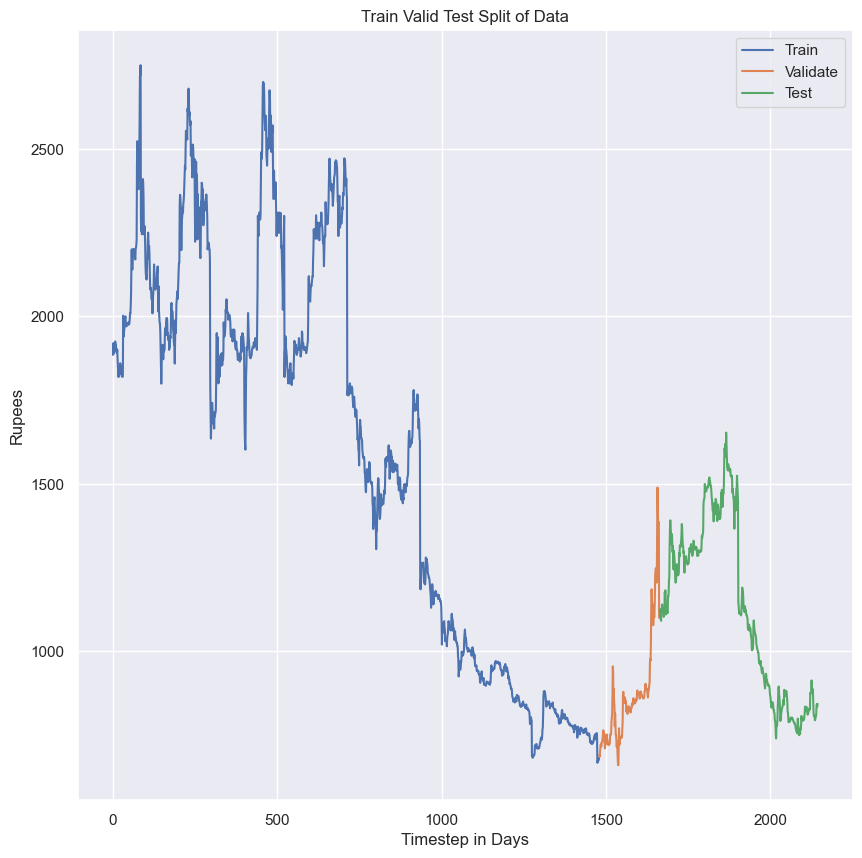

In [26]:
# SET STYLE OF CHARTS
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [10, 10]

# Create a plot showing the split of the train, valid, and test data
plt.plot(x_train, label = 'Train')
plt.plot(x_valid, label = 'Validate')
plt.plot(x_test, label = 'Test')
plt.title('Train Valid Test Split of Data')
plt.ylabel('Rupees')
plt.xlabel('Timestep in Days')
plt.legend()
plt.savefig('../Images/NAIVE/NAIVE TRAIN TEST SPLIT')

print(x_train.index.max(),x_valid.index.min(),x_valid.index.max(),x_test.index.min(),x_test.index.max())

# Base Model - Naive Forecasting
A naive forecast is naive because it takes the price from the day before and uses that price for the prediction of tomorrow. This is suprisingly effecting in this scenario due to the relatively due to autocorrelation. The price of tomorrow is dependent on the price today. Tomorrow's market open price is very close to the price of today's close.

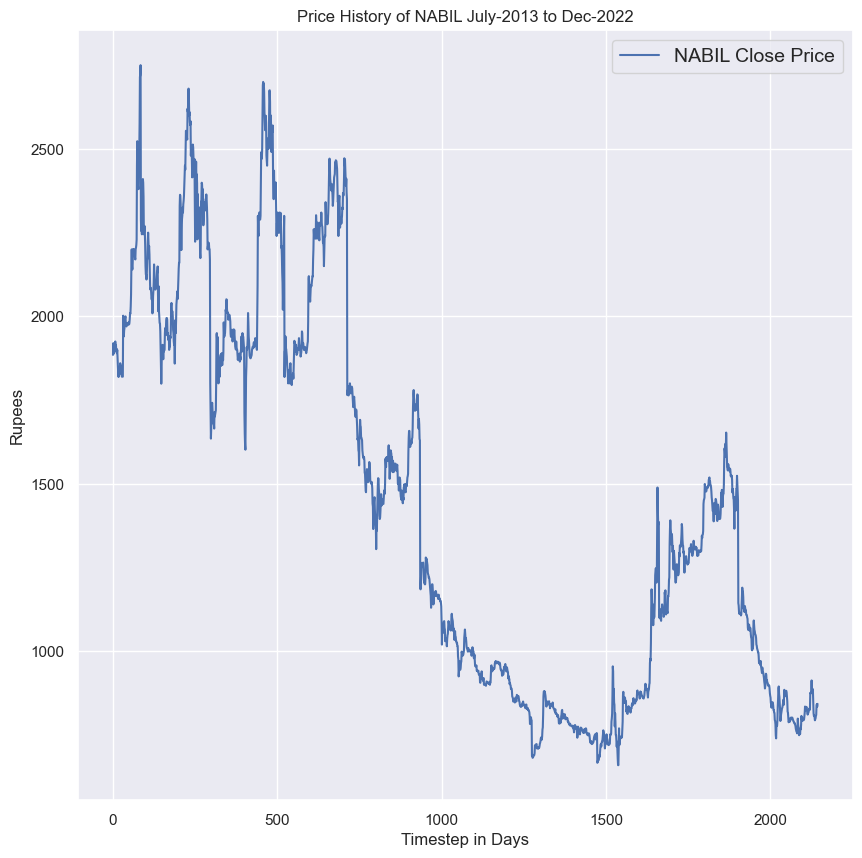

In [27]:
# PLOT CHART WITH ALL DETAILS UNTOUCHED
plot_series(time=nabil.index,series=nabil['Close'], label = 'NABIL Close Price')
plt.ylabel('Rupees')
plt.xlabel('Timestep in Days')
plt.title('Price History of NABIL July-2013 to Dec-2022')
plt.savefig('../Images/NAIVE/NAIVE NABIL CLOSE PRICE')

In [28]:
naive_forecast = series[test_split_index-1 :-1]

/Users/bijay/FINAL THESIS/PredictIt/Comparative Analysis/Notebooks/formulas.py:79: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)


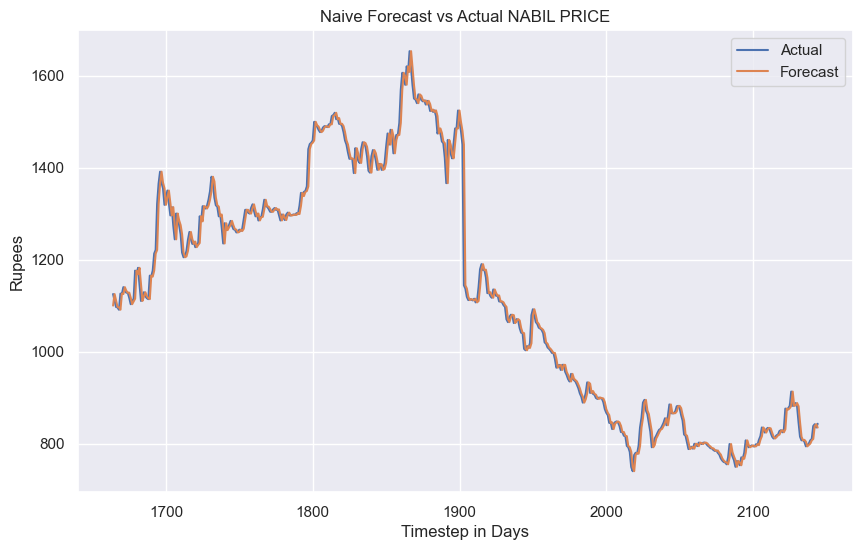

MAE FOR NAIVE IS: 13.175051975051977


<Figure size 1000x1000 with 0 Axes>

In [29]:
plt.figure(figsize=(10, 6))
plot_series(x_test.index, x_test.iloc[:], label="Actual")
plot_series(x_test.index, naive_forecast.iloc[:], label="Forecast")
plt.ylabel('Rupees')
plt.xlabel('Timestep in Days')
plt.title('Naive Forecast vs Actual NABIL PRICE')
plt.legend()
plt.show()
plt.savefig('../Images/NAIVE/NAIVE FORECAST VS ACTUAL')
# ALTERNATE WAY TO SHOW MAE TO STAY CONSISTENT WITH WHAT WE WILL BE DOING LATER
naive_forecast_mae = keras.metrics.mean_absolute_error(x_test, naive_forecast).numpy()
print(f"MAE FOR NAIVE IS: {naive_forecast_mae}")


### Calculate Error in Naive Model

In [30]:
# ALTERNATE WAY TO SHOW MAE TO STAY CONSISTENT WITH WHAT WE WILL BE DOING LATER
naive_forecast_mae = keras.metrics.mean_absolute_error(x_test, naive_forecast).numpy()
print(f"MAE FOR NAIVE IS: {naive_forecast_mae}")

# VIEW THE D

MAE FOR NAIVE IS: 13.175051975051977
